In [38]:
deps <- c("ISLR", "Metrics", "tidyr", "microbenchmark", "dplyr", "gridExtra", "readxl", "cvTools", "leaps", "assertthat", "assertr", "testthat", "lubridate", "ggplot2")
for (p in deps) {
    if (!requireNamespace(p, quietly = TRUE)) {
        install.packages(p, repos = "https://cran.rstudio.com")
    }
    library(p, character.only = TRUE)
}

options(scipen=999)
set.seed(42)

In [39]:
df <- read.csv("../data/data.csv", header = TRUE, sep = ",")

for (i in 1:ncol(df)) {
    cat(colnames(df)[i], "\n")
    cat("\ttype: ", class(df[,i]), "\n")
    cat("\tmissing: ", sum(is.na(df[,i])), "\n")
    cat("\tunique: ", length(unique(df[,i])), "\n")
    topfreq <- sort(table(df[,i]), decreasing = TRUE)[1:5]
    cat("\ttop 5 values:", names(topfreq), "\n")
}

rating 
	type:  numeric 
	missing:  1 
	unique:  6 
	top 5 values: 5 4 3 1 2 
title 
	type:  character 
	missing:  0 
	unique:  2938 
	top 5 values: Five Stars Four Stars Great Nice Good 
text 
	type:  character 
	missing:  0 
	unique:  3357 
	top 5 values: Great As expected Cool Good product I hate to &#34;review&#34; movies cause it's subjective... so honestly, I just like this movie.  If you like the actors in this film, you'll probably like this movie. 
timestamp 
	type:  character 
	missing:  0 
	unique:  3400 
	top 5 values:  2000-03-16 13:38:28.000 2000-06-11 23:08:16.000 2000-07-14 14:29:30.000 2000-07-19 14:40:40.000 
helpful_vote 
	type:  numeric 
	missing:  1 
	unique:  51 
	top 5 values: 0 1 2 3 4 
verified_purchase 
	type:  character 
	missing:  0 
	unique:  3 
	top 5 values: True False  NA NA 
category 
	type:  character 
	missing:  0 
	unique:  35 
	top 5 values: All_Beauty Amazon_Fashion Appliances Arts_Crafts_and_Sewing Automotive 
language 
	type:  character 
	missing

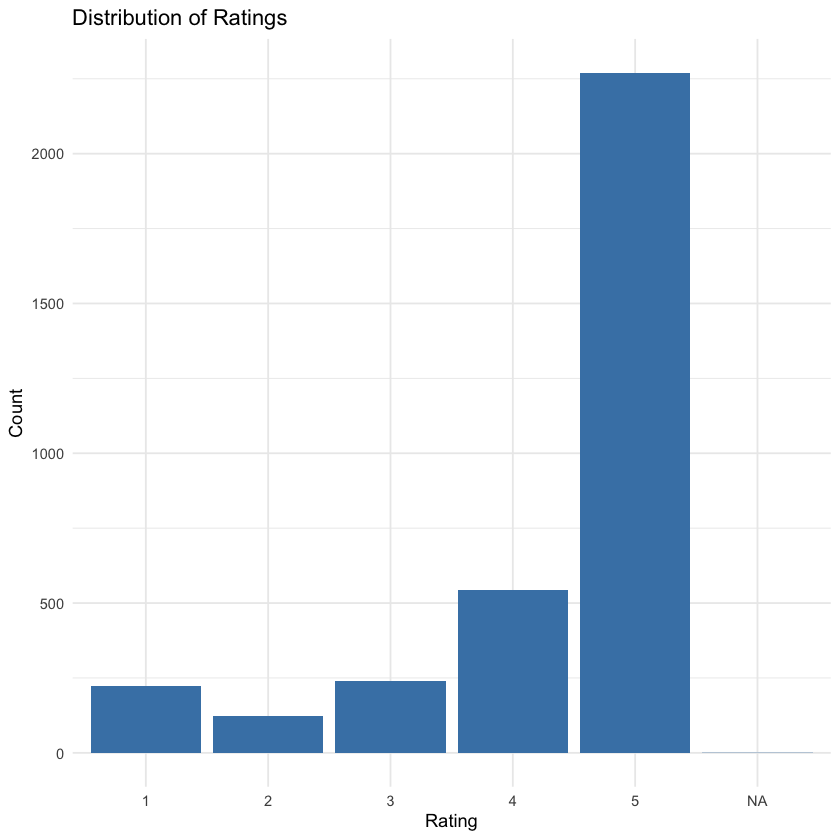

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


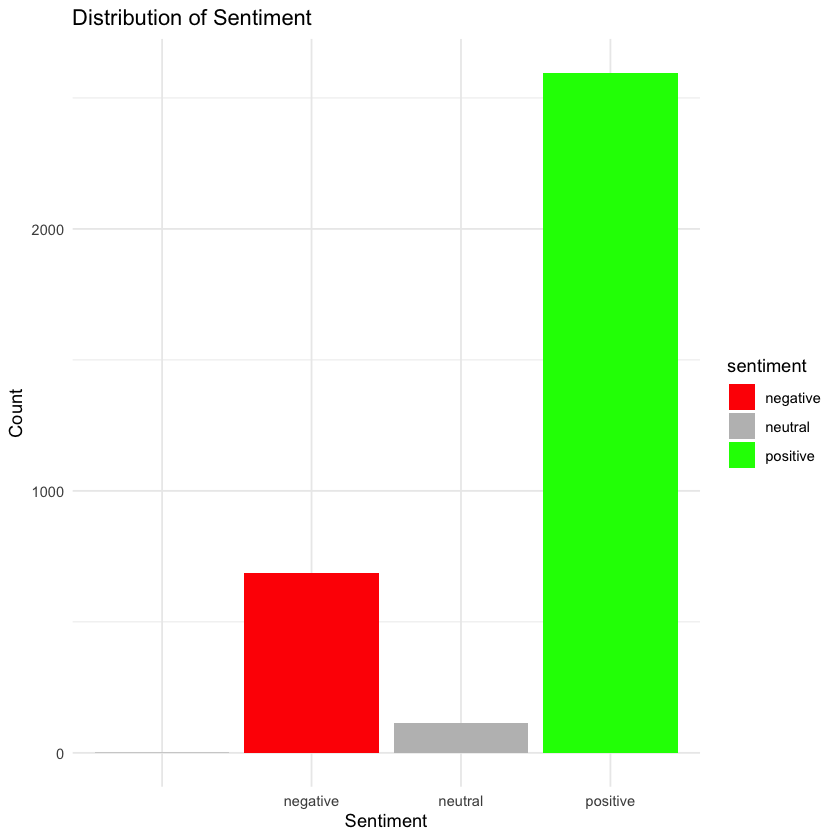

Selecting by n


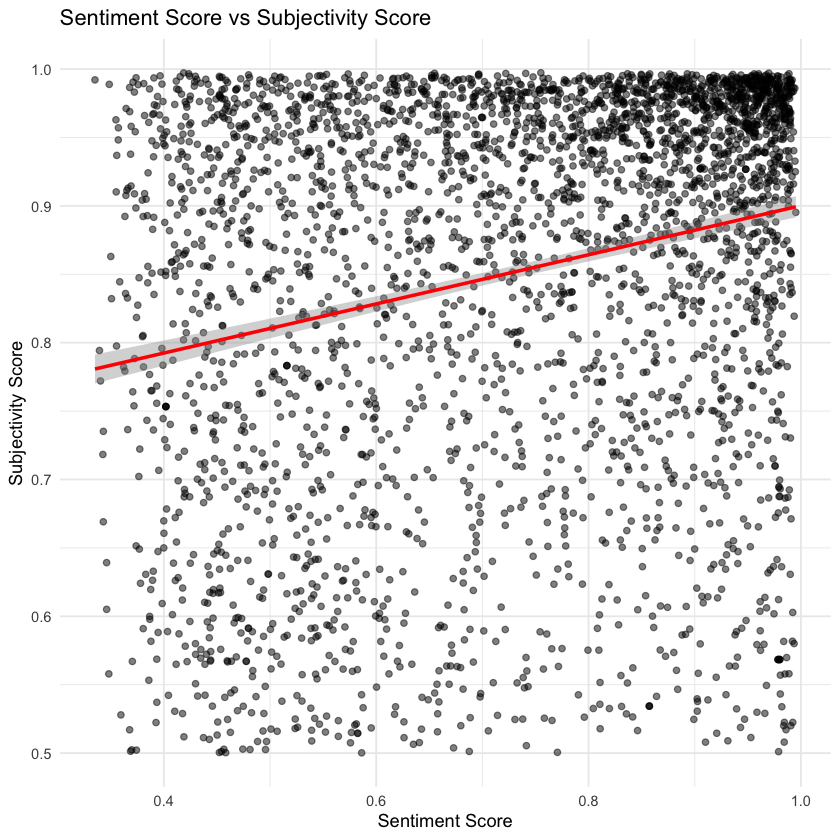

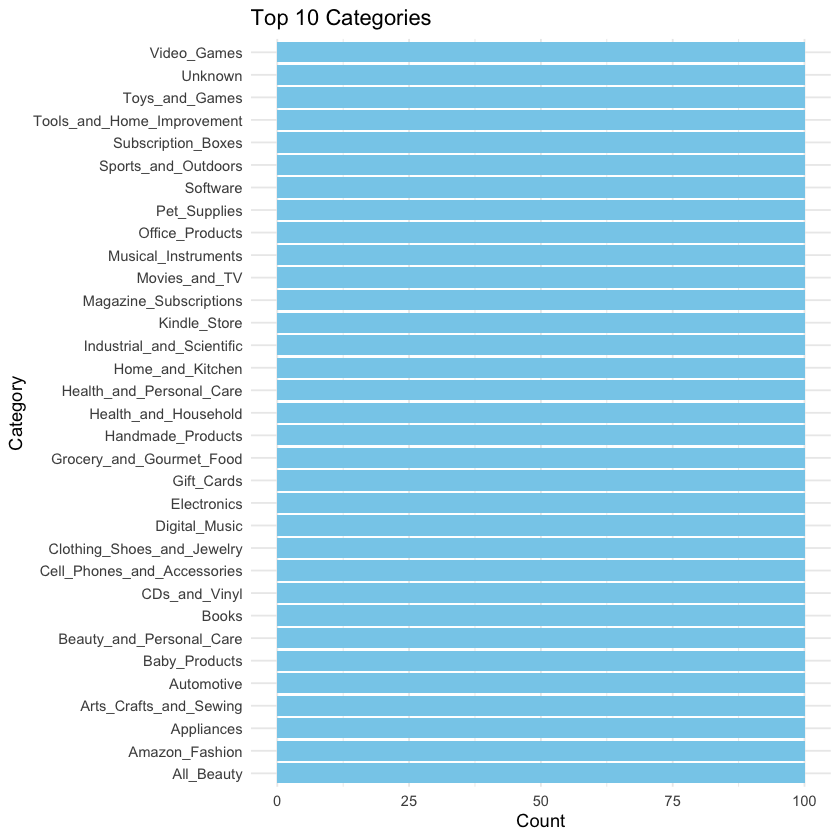

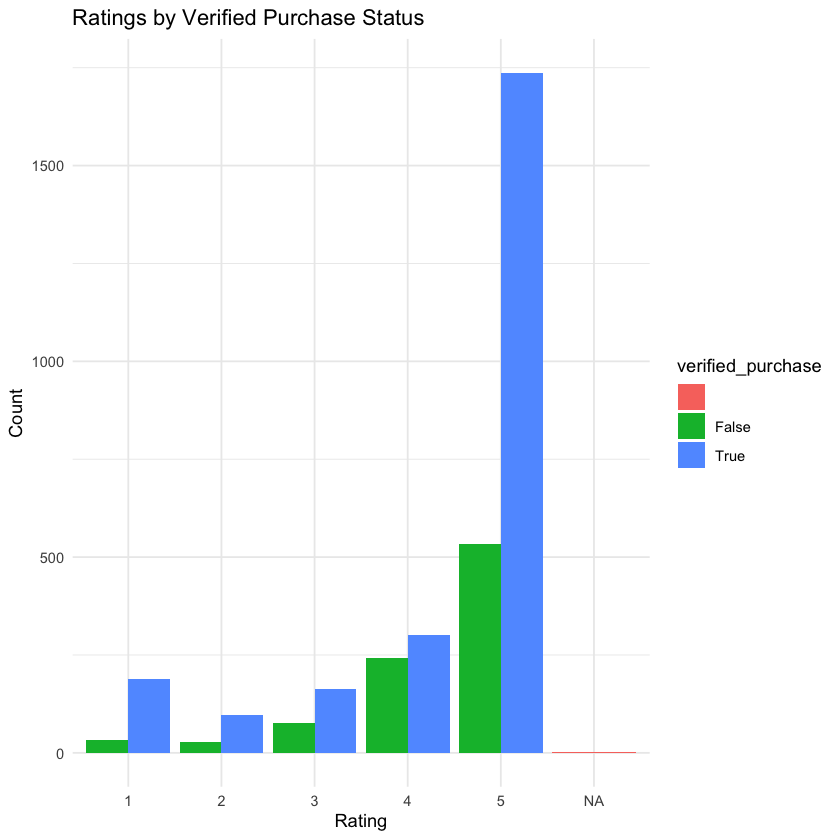

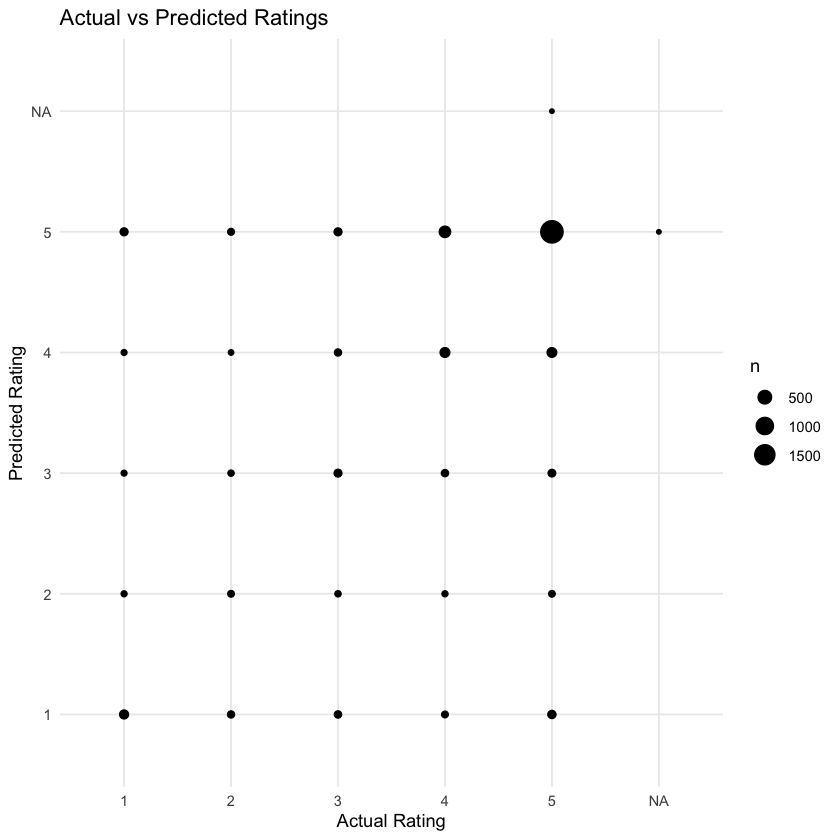

In [40]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)

# Rating Distribution
ggplot(df, aes(x = factor(rating))) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Ratings",
       x = "Rating",
       y = "Count") +
  theme_minimal()

# Sentiment Analysis
ggplot(df, aes(x = sentiment, fill = sentiment)) +
  geom_bar() +
  scale_fill_manual(values = c("positive" = "green", 
                              "negative" = "red", 
                              "neutral" = "gray")) +
  labs(title = "Distribution of Sentiment",
       x = "Sentiment",
       y = "Count") +
  theme_minimal()

# Sentiment Score vs Subjectivity Score
ggplot(df, aes(x = sentiment_score, y = subjectivity_score)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Sentiment Score vs Subjectivity Score",
       x = "Sentiment Score",
       y = "Subjectivity Score") +
  theme_minimal()

# Top Categories
df %>%
  count(category) %>%
  top_n(10) %>%
  ggplot(aes(x = reorder(category, n), y = n)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +
  labs(title = "Top 10 Categories",
       x = "Category",
       y = "Count") +
  theme_minimal()

# Verified Purchase vs Rating
ggplot(df, aes(x = factor(rating), fill = verified_purchase)) +
  geom_bar(position = "dodge") +
  labs(title = "Ratings by Verified Purchase Status",
       x = "Rating",
       y = "Count") +
  theme_minimal()

# Rating Prediction Accuracy
ggplot(df, aes(x = factor(rating), y = factor(predicted_rating))) +
  geom_count() +
  labs(title = "Actual vs Predicted Ratings",
       x = "Actual Rating",
       y = "Predicted Rating") +
  theme_minimal()